In [72]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import numpy as np

In [6]:
%run ./util.ipynb

In [18]:
path_startup = "/home/alex/vscode/data/original/crunchbase/startups/**/*.csv"
df_startup = concat_files(path_startup, ['Organization Name'])
df_startup.to_csv("/home/alex/vscode/data/original/crunchbase/consolidado/startups.csv")
# path_aquisicoes = "/home/alex/vscode/data/original/crunchbase/aquisicoes/*.csv"
# df_aquisicoes = concat_files(path_aquisicoes, ['Transaction Name'])
# df_aquisicoes.to_csv("/home/alex/vscode/data/original/crunchbase/consolidado/aquisicoes.csv")


_20120331_20120430.csv
/home/alex/vscode/data/original/crunchbase/startups/Pre-seed/startups_20180131_20180228.csv
/home/alex/vscode/data/original/crunchbase/startups/Pre-seed/startups_20121231_20130131.csv
/home/alex/vscode/data/original/crunchbase/startups/Pre-seed/startups_20090531_20090630.csv
/home/alex/vscode/data/original/crunchbase/startups/Pre-seed/startups_20090430_20090531.csv
/home/alex/vscode/data/original/crunchbase/startups/Pre-seed/startups_20130131_20130228.csv
/home/alex/vscode/data/original/crunchbase/startups/Pre-seed/startups_20160930_20161031.csv
/home/alex/vscode/data/original/crunchbase/startups/Pre-seed/startups_20140930_20141031.csv
/home/alex/vscode/data/original/crunchbase/startups/Pre-seed/startups_20141031_20141130.csv
/home/alex/vscode/data/original/crunchbase/startups/Pre-seed/startups_20170531_20170630.csv
/home/alex/vscode/data/original/crunchbase/startups/Pre-seed/startups_20101130_20101231.csv
/home/alex/vscode/data/original/crunchbase/startups/Pre-s

In [53]:
df_startup = pd.read_csv("/home/alex/vscode/data/original/crunchbase/consolidado/startups.csv", engine='python')
df_startup.drop(261, inplace=True) ## Tinha um valor errado na data

In [66]:
df_startup['Last Funding Date'] = df_startup['Last Funding Date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d") if type(x) == str else x)
df_startup['Last_Funding_Year'] = df_startup['Last Funding Date'].apply(lambda x: x.year)

df_startup['Founded Date'] = df_startup['Founded Date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d") if type(x) == str else x)
df_startup['Founded_Year'] = df_startup['Founded Date'].apply(lambda x: x.year)
df_new = df_startup.loc[df_startup['Founded_Year'] >= 2017, :]

0        2014
1        2014
2        2014
3        2014
4        2012
         ... 
21376    2012
21377    2012
21378    2012
21379    2012
21380    2012
Name: Founded_Year, Length: 21380, dtype: int64

In [74]:
df_new['inter_funding_period'] = df_new['Last Funding Date'] - df_new['Founded Date']
df_new['inter_funding_days'] = df_new['inter_funding_period'].apply(lambda x: x/np.timedelta64(1, 'D'))
df_new['inter_funding_days']

7        714.0
8        705.0
9        471.0
10       225.0
11       136.0
         ...  
20079    394.0
20080    398.0
20081    684.0
20082     22.0
20083    696.0
Name: inter_funding_days, Length: 7018, dtype: float64

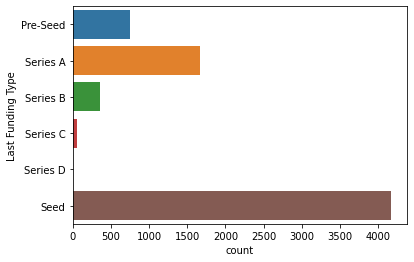

In [47]:
ax = sns.countplot(y="Last Funding Type", data=df_new)

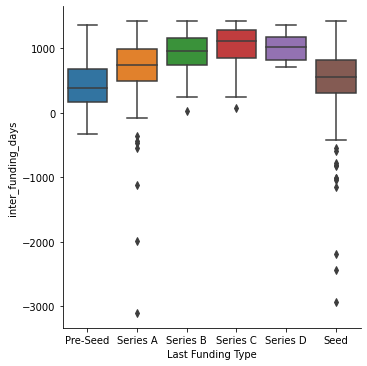

In [75]:
ax = sns.catplot(y="inter_funding_days", data=df_new, kind="box", x="Last Funding Type")


In [94]:
## Filter seed and pre-seed
# fs_seed = df_startup['Funding Status'] == 'Seed'
# lft_seed = df_startup['Last Funding Type'].isin(['Seed', 'Grant', 'Angel', 'Pre-Seed'])
# old_seed = df_startup['Last_Funding_Year'] <= 2017
# select_seed = fs_seed & lft_seed & old_seed
# df_startup.loc[select_seed, 'Success'] = False
# select_seed.sum()

321

In [95]:
## Filter series
select_series = df_startup['Last Funding Type'].isin(['Series B', 'Series C', 'Series D', 'Series E'])
df_startup.loc[select_series, 'Success'] = True
select_series.sum()

339

In [96]:
df_result = df_startup.dropna(subset=['Success'])
df_result.to_csv("/home/alex/vscode/data/processado/crunchbase/startups.csv")